# Import

In [7]:
import numpy as np
import scipy.integrate as i
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as c
from shooting import *
import scipy.optimize as o
import scipy.integrate as integ

# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "serif",
#     "font.serif": ["Computer Modern Roman"],
# })
plt.rcParams.update(plt.rcParamsDefault)

f = 16

# import cmath as cm
from shooting import *
import shootingres as shr
import shooting as sho

import scipy.optimize as o
try:
    import cPickle as pickle
except ImportError:
    import pickle
    
import ray

import seaborn as sns
sns.set_theme()
sns.set_style("white")
sns.set_style("ticks")
sns.set_style("ticks",{'axes.grid' : True})
import scienceplots
plt.style.use('science')
import numba
f = 16


In [9]:
## SET CONSTANTS
rho = (1.0*10**19) * (2.0*1.6725*10**(-27))
mu_0 = 1.2566*10**(-6)

# Define Normalizations
r1 = 0.1

## Define OMEGA0:
bb = 10000
v0 = bb/np.sqrt(r1)
Omega0 = v0/r1

# Hain

In [ ]:
def shoot_hain_v3(w, eta, qr, qrp, qi, qip,  k=np.pi/2, m=1, B0=0, Bz = 0, keplerian=True, cc=1, r2=5, max=500, q=1/2):
    ## DIFF IS INCLUDES IMAG
    y0 = [0.,1.+1.j]
    y = i.solve_ivp(shoot_setup_hain_v2, [1,r2**2], y0, args=(w,eta, qr, qrp, qi, qip, m,k,B0,Bz, keplerian,cc, q), max_step=24./(max/r2))
    r = np.sqrt(y.t)
    u = y.y[0]
    return ((u/r)[-1])

### REDONE DERIVATION
def shoot_setup_hain_v2(x, y, w, elecd, k2rs, k2rps, k2is, k2ips, m, kz=np.pi/4, B0=60, Bz=12.967, keplerian=True, cc=1, q=1/2):
    mu_0 = 1.2566*10**(-6)
     ### PM = 1
    r = np.sqrt(x)
    k2 = k2rs(r) + 1j*k2is(r)
    k2p = k2rps(r) + 1j*k2ips(r)
    vp1 = 1
    if keplerian == True:
        vp = vp1/(x**(1/4))
        W = vp/r
        Wp = -3/4*vp1/(x**(7/4)) * 2*r
        Wpp = 21/16*vp1/(x**(11/4)) * 4 * r**2
    elif keplerian == 'khalzov':
        W = vp1/x
        Wp = -vp1/x**2
    elif keplerian == 'rigid':
        W = vp1
        Wp = 0
    elif keplerian == False:
        vp = vp1/(x**(q/2))
        W = vp/r
        Wp = (-1*(q+1)/2)*(W/x)
    elif keplerian == 'saturated':
        A0 = 1.4923889E-02
        A1 = -1.0114824E-01
        A2 = 8.5753488E-02
        A3 = -2.8021088E-02
        A4 = -4.7882189E-01
        A5 = 1.0877462E-01
        A6 = 6.7857446E+00
        A7 = -5.0846913E+00
        A8 = -4.3114342E+01
        A9 = 5.2943846E+01
        A10 = 1.2219068E+02
        A11 = -1.9185099E+02
        A12 = -1.7535573E+02
        A13 = 3.4808679E+02
        A14 = 1.1975807E+02
        A15 = -3.4500839E+02
        A16 =  -1.4844420E+01
        A17 = 1.7930272E+02
        A18 = -2.5033736E+01
        ###  0.08875 + 0.91125/r^2 
        W = 0.08875 + 0.91125/r**2 + A0 + A1*(r-2) + A2*(r-2)**2+A3*(r-2)**3 + A4*(r-2)**4 + A5*(r-2)**5 + A6*(r-2)**6 + A7*(r-2)**7 + A8*(r-2)**8 + A9*(r-2)**9 + A10*(r-2)**10 + A11*(r-2)**11 + A12*(r-2)**12 + A13*(r-2)**13 + A14*(r-2)**14 + A15*(r-2)**15 + A16*(r-2)**16 + A17*(r-2)**17 + A18*(r-2)**18 - ( A1 + A3 + A5 + A7 + A9 + A11 + A13 + A15 + A17 )*(r-2)**19 - ( A0 + A2 + A4 + A6 + A8 + A10 + A12 + A14 + A16 + A18 )*(r-2)**20
        Wp = - 2 * 0.91125/r**3  + A1 + 2*A2*(r-2) + 3*A3*(r-2)**2 + 4*A4*(r-2)**3 + 5*A5*(r-2)**4 + 6*A6*(r-2)**5 + 7*A7*(r-2)**6 + 8*A8*(r-2)**7 + 9*A9*(r-2)**8 + 10*A10*(r-2)**9 + 11*A11*(r-2)**10 + 12*A12*(r-2)**11 + 13*A13*(r-2)**12 + 14*A14*(r-2)**13 + 15*A15*(r-2)**14 + 16*A16*(r-2)**15 + 17*A17*(r-2)**16 + 18*A18*(r-2)**17 - 19*( A1 + A3 + A5 + A7 + A9 + A11 + A13 + A15 + A17 )*(r-2)**18 - 20*( A0 + A2 + A4 + A6 + A8 + A10 + A12 + A14 + A16 + A18 )*(r-2)**19
        Wpp = 3 * 2 * 0.91125/r**4  + 2*A2 + 3 * 2 * A3*(r-2) + 4 * 3 * A4*(r-2)**2 + 5 * 4 * A5*(r-2)**3 + 6 * 5 * A6*(r-2)**4 + 7 * 6 * A7*(r-2)**5 + 8 * 7 * A8*(r-2)**6 + 9 * 8 * A9*(r-2)**7 + 10 * 9  * A10*(r-2)**8 + 11 * 10 * A11*(r-2)**9 + 12 * 11 * A12*(r-2)**10 + 13 * 12 * A13*(r-2)**11 + 14 * 13 * A14*(r-2)**12 + 15 * 14 * A15*(r-2)**13 + 16 * 15 * A16*(r-2)**14 + 17 * 16 * A17*(r-2)**15 + 18 * 17 * A18*(r-2)**16 - 19 * 18 * ( A1 + A3 + A5 + A7 + A9 + A11 + A13 + A15 + A17 )*(r-2)**17 - 20 * 19 * ( A0 + A2 + A4 + A6 + A8 + A10 + A12 + A14 + A16 + A18 )*(r-2)**18 
        
    elif keplerian == 'saturated2':
        W = W_f(r)
        Wp = Wp_f(r)
        Wpp = Wpp_f(r)
    elif keplerian == 'tanh':
        a = c = b = d = 1
        d = 0.85
        W = d*np.tanh(-c*r+a)+b
        
        #Wp = -c *d*sech^2(a - c r)
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'tanhv3':
        a = c = b = d = 1
        d = 0.84
        W = d*np.tanh(-c*r+a)+b
        
        #Wp = -c *d*sech^2(a - c r)
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'tanhv4':
        a = c = b = d = 1
        a = 0.6
        c = a
        d = 0.9
        W= d*np.tanh(-c*r+a)+b
        Wp = -c * d * (1/np.cosh(-c * r + a))**2
        Wpp = -2 * c**2 * d * np.tanh(-c * r + a)*(1/np.cosh(-c * r + a))**2
    elif keplerian == 'mKep':
        r10 = 1.5
        R0 = 1

        if(r < r10):
            W = 1
            Wp = 0
            Wpp = 0
        else:
            W = 1/(1+((r-r10)/R0)**(3/2))
            Wp = -3/(2*R0)*((r-r10)/R0)**(1/2)/(1+((r-r10)/R0)**(3/2))**2
            u = 1+((r-r10)/R0)**(3/2)
            up = 3/(2*R0)*((r-r10)/R0)**(1/2)
            Wpp = -( (3/(4*R0**2)*(1/R0*(r-r10))**(-1/2))*u**2 - (3/(2*R0) * (1/R0*(r-r10))**(1/2))*2*u*up)/(u**4)
        
    # Define Normalizations
    r1 = 0.1

    ## Define OMEGA0:
    bb = 10000
    v0 = bb/np.sqrt(r1)
    Omega0 = v0/r1

    vAp1 = B0/(r1*Omega0*np.sqrt(rho*mu_0)*10000)
    
    vAp = vAp1/np.sqrt(x)
    vAz = Bz / (r1*Omega0*np.sqrt(rho*mu_0)*10000)
    
    ### MODIFY w
    wA = (m/np.sqrt(x))*vAp + kz*vAz
    wb = w-m*W
    wc = 2*vAp/np.sqrt(x)*cc
    
    wAp = -m*vAp1/x**2*2*r
    wcp = -2*vAp1/x**2*cc*2*r


    # elecd = elecd / (r1**2*Omega0)*2
    elecd = elecd / (r1**2*Omega0)
    nu = elecd*1

    ### Note this is k2p with respect to r.
    wbp = -m*Wp
    wbpp = -m*Wpp
    lnu = -1j*wb + nu*k2
    lnup = -1j*wbp + nu*k2p
    leta = -1j*wb + elecd*k2
    letap = -1j*wbp + elecd*k2p
    
    L = lnu + wA**2/(leta)
    Lp = lnup + 2*wA*wAp/leta - wA**2*letap/(leta**2)
    h2 = kz**2 + m**2/r**2
    h = np.sqrt(h2)
    hp = -1/h*(m**2/r**3)
    E = L**2 + L*r/leta * wc * (1j*wA*Wp/leta - 1/2*wcp) + 2*(W - 1j*1/2*wc*wA/leta)*(2*W + (1+wA**2/leta**2)*r*Wp - 1j*wA*wc/leta)
    f = 2*r**2*(leta*lnu + wA**2)/((kz**2*r**2+m**2))
    fp = 1/(kz**2*r**2+m**2) * (4*r*(leta*lnu + wA**2) +2*r**2*(letap*lnu+leta*lnup + 2*wA*wAp)) - 1/(kz**2*r**2+m**2)**2 * (4*kz**2*r**3*(lnu*leta + wA**2))
    s = (1j*m*(lnu - leta)/(h**2*r)*Wp)
    g_dr_num_undiff = ((leta - lnu) * r * Wp + 2*(W*leta - 1/2*1j*wc*wA)) ## modified
    g_dr_num_diff = (letap - lnup) * r * Wp + (leta - lnu)*(Wp + r*Wpp) + 2*(Wp*leta + W*letap - 1/2*1j*wcp*wA - 1/2*1j*wc*wAp)
    g_dr_denom_undiff = h**2*r**2
    g_dr_denom_diff = 2*h*hp*r**2 + 2*h**2*r
    g_dr_term = 1j*m*(g_dr_num_diff/g_dr_denom_undiff - g_dr_num_undiff*g_dr_denom_diff/g_dr_denom_undiff**2)

    g = g_dr_term + E*leta/(L*r) - (W - 1j*1/2*wc*wA/leta)*(2*m**2/(L*h**2*r**3))*((leta - lnu)*r*Wp + 2*(W*leta - 1j * 1/2*wA*wc))

    u, du = y

    ### REWRITE ALL TERMS
    f = leta*L/(h**2*r)
    fp = (letap*L + leta*Lp)/(h**2*r) - leta*L*(2*h*hp*r+h**2)/(h**2*r)**2

    u_coeff = 1/(-4*r)*-g
    du_coeff = -1/(4*r)*(2*(f+r*fp)) - s/(2)
    d2u_coeff = -r*f
    dudx = [du, (1/d2u_coeff)*(-du_coeff*du - u_coeff*u)]

    return dudx

# Profile

0      1.00
1      1.01
2      1.02
3      1.03
4      1.04
       ... 
196    2.96
197    2.97
198    2.98
199    2.99
200    3.00
Name: 0, Length: 201, dtype: float64


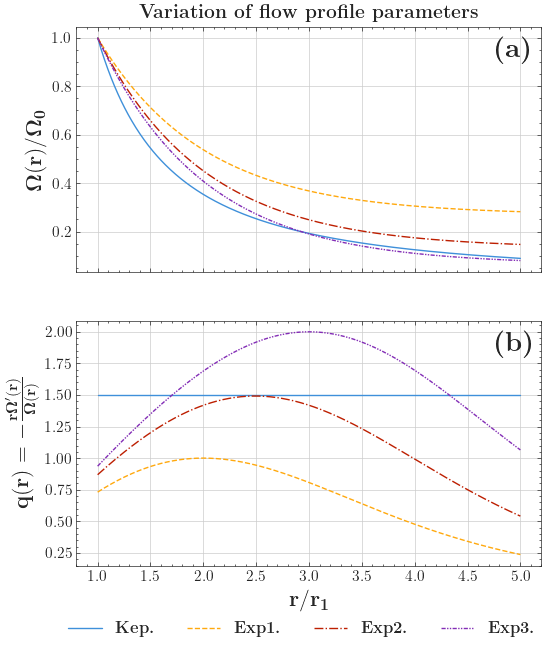

In [ ]:
import pandas as pd
from numpy.polynomial import Chebyshev as T
color_arr = ['#3F90DA', '#FFA90E', '#BD1F01', '#94A4A2', '#832DB6', '#A96B59', '#E76300', '#B9AC70', '#92DADD']

r = np.linspace(1,5,500)
data = pd.read_csv('Re750_4_0.1_0_to_1.txt', header = None, delim_whitespace=True)
print(data[0])
r_f = data[0]
W = data[1]
qr = data[2]
Wr = W
W_f = i2.CubicSpline(r_f, W)
Wp_f = W_f.derivative()

########
a = c = b = d = 1
a = 0.6
c = a
d = 0.9
r10 = 1.5
R0 = 1
W_mkep = np.zeros(len(r))
W_mkepp = np.zeros(len(r))

W_mkeppp = np.zeros(len(r))

for j in range(0,len(r)):
    if(r[j] < r10):
        W_mkep[j] = 1
    else:
        W_mkep[j] = 1/(1+((r[j]-r10)/R0)**(3/2))
        W_mkepp[j] = -3/(2*R0)*((r[j]-r10)/R0)**(1/2)/(1+((r[j]-r10)/R0)**(3/2))**2
        u = 1+((r[j]-r10)/R0)**(3/2)
        up = 3/(2*R0)*((r[j]-r10)/R0)**(1/2)
        W_mkeppp[j] = ( (3/(4*R0**2)*(1/R0*(r[j]-r10))**(-1/2))*u**2 - (3/(2*R0) * (1/R0*(r[j]-r10))**(1/2))*2*u*up)/(u**4)
# W_mkepppf = i2.CubicSpline(r,W_mkep).derivative().derivative()(r)

a = 0.9366210025563255
W_mkep = a*np.exp(1-r) + (1-a)
W_mkep_f = i2.CubicSpline(r,W_mkep)
W_mkepp = W_mkep_f.derivative()(r)

########
a = c = b = d = 1
a = 0.6
c = a
d = 0.9
r10 = 1.5
R0 = 1.5
W_mkep2 = np.zeros(len(r))
W_mkepp2 = np.zeros(len(r))

W_mkeppp2 = np.zeros(len(r))

for j in range(0,len(r)):
    if(r[j] < r10):
        W_mkep2[j] = 1
    else:
        W_mkep2[j] = 1/(1+((r[j]-r10)/R0)**(3/2))
        W_mkepp2[j] = -3/(2*R0)*((r[j]-r10)/R0)**(1/2)/(1+((r[j]-r10)/R0)**(3/2))**2
        u = 1+((r[j]-r10)/R0)**(3/2)
        up = 3/(2*R0)*((r[j]-r10)/R0)**(1/2)
        W_mkeppp2[j] = ( (3/(4*R0**2)*(1/R0*(r[j]-r10))**(-1/2))*u**2 - (3/(2*R0) * (1/R0*(r[j]-r10))**(1/2))*2*u*up)/(u**4)
# W_mkepppf = i2.CubicSpline(r,W_mkep).derivative().derivative()(r)

# a = .75
# c = a
# d = 1/(np.tanh(-4*a))*(1/5**(3/2)-1)-0.025
a = 0.8689352412721272
W_tanh_4 = a*np.exp(1-r) + (1-a)
W_tanh_f_4 = i2.CubicSpline(r,W_tanh_4)
Wp_tanh_4 = W_tanh_f_4.derivative()(r)

#####
x = r**2
A0 = 1.4923889E-02
A1 = -1.0114824E-01
A2 = 8.5753488E-02
A3 = -2.8021088E-02
A4 = -4.7882189E-01
A5 = 1.0877462E-01
A6 = 6.7857446E+00
A7 = -5.0846913E+00
A8 = -4.3114342E+01
A9 = 5.2943846E+01
A10 = 1.2219068E+02
A11 = -1.9185099E+02
A12 = -1.7535573E+02
A13 = 3.4808679E+02
A14 = 1.1975807E+02
A15 = -3.4500839E+02
A16 =  -1.4844420E+01
A17 = 1.7930272E+02
A18 = -2.5033736E+01
###  0.08875 + 0.91125/r^2 
# q = 1
# vp1 = 0.91125
# c = 0.08875
# vp = vp1/(x**(q/2))
# W = c + vp/np.sqrt(x)
W = 0.08875 + 0.91125/np.sqrt(x)**2 + A0 + A1*(np.sqrt(x)-2) + A2*(np.sqrt(x)-2)**2+A3*(np.sqrt(x)-2)**3 + A4*(np.sqrt(x)-2)**4 + A5*(np.sqrt(x)-2)**5 + A6*(np.sqrt(x)-2)**6 + A7*(np.sqrt(x)-2)**7 + A8*(np.sqrt(x)-2)**8 + A9*(np.sqrt(x)-2)**9 + A10*(np.sqrt(x)-2)**10 + A11*(np.sqrt(x)-2)**11 + A12*(np.sqrt(x)-2)**12 + A13*(np.sqrt(x)-2)**13 + A14*(np.sqrt(x)-2)**14 + A15*(np.sqrt(x)-2)**15 + A16*(np.sqrt(x)-2)**16 + A17*(np.sqrt(x)-2)**17 + A18*(np.sqrt(x)-2)**18 - ( A1 + A3 + A5 + A7 + A9 + A11 + A13 + A15 + A17 )*(np.sqrt(x)-2)**19 - ( A0 + A2 + A4 + A6 + A8 + A10 + A12 + A14 + A16 + A18 )*(np.sqrt(x)-2)**20
Wp = -0.91125/x**2 + A1*1/(2*np.sqrt(x)) + A2*(np.sqrt(x)-2)/np.sqrt(x) + A3*(np.sqrt(x)-2)**2*3/(2*np.sqrt(x)) + A4*(np.sqrt(x)-2)**3*4/(2*np.sqrt(x)) + A5*(np.sqrt(x)-2)**4*5/(2*np.sqrt(x)) + A6*(np.sqrt(x)-2)**5*6/(2*np.sqrt(x)) + A7*(np.sqrt(x)-2)**6*7/(2*np.sqrt(x)) + A8*(np.sqrt(x)-2)**7*8/(2*np.sqrt(x)) + A9*(np.sqrt(x)-2)**8*9/(2*np.sqrt(x)) + A10*(np.sqrt(x)-2)**9*10/(2*np.sqrt(x)) + A11*(np.sqrt(x)-2)**10*11/(2*np.sqrt(x)) + A12*(np.sqrt(x)-2)**11*12/(2*np.sqrt(x)) + A13*(np.sqrt(x)-2)**12*13/(2*np.sqrt(x)) + A14*(np.sqrt(x)-2)**13*14/(2*np.sqrt(x)) + A15*(np.sqrt(x)-2)**14*15/(2*np.sqrt(x)) + A16*(np.sqrt(x)-2)**15*16/(2*np.sqrt(x)) + A17*(np.sqrt(x)-2)**16*17/(2*np.sqrt(x)) + A18*(np.sqrt(x)-2)**17*18/(2*np.sqrt(x)) - ( A1 + A3 + A5 + A7 + A9 + A11 + A13 + A15 + A17 )*(np.sqrt(x)-2)**18*19/(2*np.sqrt(x))  - ( A0 + A2 + A4 + A6 + A8 + A10 + A12 + A14 + A16 + A18 )*(np.sqrt(x)-2)**19*20/(2*np.sqrt(x))     

W_poly = [1.46802831e-03, -2.83431433e-02,  2.11559654e-01, -6.57109947e-01,
-7.64601799e-02,  5.06678730e+00, -2.62954978e+00, -4.01210227e+01,
3.04579779e+01,  3.28246953e+02, -3.87065814e+02, -2.53347841e+03,
6.08416910e+03,  1.15343384e+04, -8.08073232e+04,  1.87829866e+05,
-2.54049234e+05,  2.18505853e+05, -1.18520251e+05,  3.71863092e+04,
-5.16265540e+03]

Wp_poly = [ 1.50454341e-03, -2.90564928e-02,  2.17042785e-01, -6.75645388e-01,
-6.89528913e-02,  5.18655592e+00, -2.78166003e+00, -4.09358742e+01,
3.19109263e+01,  3.33876372e+02, -4.00882065e+02, -2.56600921e+03,
6.22259476e+03,  1.15597185e+04, -8.18501208e+04,  1.90676951e+05,
-2.58212766e+05,  2.22286042e+05, -1.20664426e+05,  3.78871342e+04,
-5.26393755e+03]

Wf = W_poly[0] + W_poly[1]*r + W_poly[2]*r**2 + W_poly[3]*r**3 + W_poly[4]*r**4 + W_poly[5]*r**5 + W_poly[6]*r**6 + W_poly[7]*r**7 + W_poly[8]*r**8 + W_poly[9]*r**9+ W_poly[10]*r**10 +  W_poly[11]*r**11  +  W_poly[12]*r**12 +  W_poly[13]*r**13   +  W_poly[14]*r**14  +  W_poly[15]*r**15 +  W_poly[16]*r**16  +  W_poly[17]*r**17  +  W_poly[18]*r**18  +  W_poly[19]*r**19  +  W_poly[20]*r**20 

# plt.plot(r_f,Wr, label = 'sat2-unf')
# plt.plot(r, 1/r**(3/2), label = 'kep')
# plt.plot(r, W, label = 'sat')
# plt.plot(r_f, W_f(r_f), label = 'sat2')
# # plt.plot(r, Wf, label ='satfit')

# plt.legend()
# plt.xlabel('r')
# plt.ylabel(r'$\Omega(r)$/$\Omega_0$')

r = np.linspace(1,5,500)
# print(r)
# Ws = i2.CubicSpline(r,W)
# Wp = Ws.derivative()
a = 0.73123123
W_tanh = a*np.exp(1-r) + (1-a)
W_tanh_f = i2.CubicSpline(r,W_tanh)
Wp_tanh = W_tanh_f.derivative()(r)

# fig, axs = plt.subplots(2)
# fig.set_figheight(7)
# fig.set_figwidth(6)

fig, axs = plt.subplots(2)
# fig.set_figheight(6)
# fig.set_figwidth(5)
fig.set_figheight(7)
fig.set_figwidth(6)
axs[0].plot(r, 1/r**(3/2), label = r'\textbf{Kep.}', color = color_arr[0])

axs[0].plot(r, W_tanh, label = r'\textbf{Exp1.}', linestyle = '--', color = color_arr[1])
axs[0].plot(r, W_tanh_4, label = r'\textbf{Exp2.}', linestyle = '-.', color = color_arr[2])
axs[0].plot(r, W_mkep, label = r'\textbf{Exp3.}', linestyle = (0, (3, 1, 1, 1, 1, 1)), color = color_arr[4])
# axs[0].plot(r, W_mkep2, label = 'mKep2.', linestyle = ':', color = color_arr[6])

# # axs[0].set_xlabel
# axs[0].plot(r_f, W_f(r_f), label = 'Sat2.', linestyle = '-.', color = color_arr[2])
# axs[0].plot(r, 1/r**2, label = 'Sh2.', linestyle = (0, (3, 1, 1, 1, 1, 1)), color = color_arr[4])


axs[0].set_title(r'\textbf{Variation of flow profile parameters}', fontsize = 14)
# axs[1].plot(r, 1/r**(3/2), label = 'kep')
axs[1].plot(r, r/(1/r**(3/2)) * (3/2)/r**(5/2), color = color_arr[0])

axs[1].plot(r, -r*Wp_tanh/W_tanh, linestyle = '--', color = color_arr[1])
axs[1].plot(r, -r*Wp_tanh_4/W_tanh_4, linestyle = '-.', color = color_arr[2])
axs[1].plot(r, -r/W_mkep*W_mkepp, linestyle = (0, (3, 1, 1, 1, 1, 1)), color = color_arr[4])
# axs[1].plot(r, -r/W_mkep2*W_mkepp2, linestyle = ':', color = color_arr[6])

# axs[1].plot(r_f, -r_f/W_f(r_f)*Wp_f(r_f), linestyle = '-.', color = color_arr[2])
# axs[1].plot(r, 2*np.ones(len(r)), linestyle = (0, (3, 1, 1, 1, 1, 1)), color = color_arr[4])

# axs[1].plot(r, -r*W_mkepp/W_mkep)


axs[0].set(xlabel='x-label', ylabel=r'$\Omega(r)/\Omega_0$')
axs[1].set(xlabel=r'$r/r_1$', ylabel=r"$q(r) = -\frac{r\Omega'(r)}{\Omega(r)}$")
axs[0].set_ylabel(r'$\mathbf{\Omega(r)/\Omega_0}$', fontsize =16)
axs[1].set_xlabel(r"$\mathbf{r/r_1}$", fontsize=16) 
axs[1].set_ylabel(r"$\mathbf{q(r) = -\frac{r\Omega'(r)}{\Omega(r)}}$", fontsize=16) 

# axs[1].set_title('Axis [1, 1]')

# for ax in axs.flat:
#     ax.set(xlabel='x-label', ylabel='y-label')
axs[0].text(0.90, 0.96, r'\textbf{(a)}', transform=axs[0].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')
axs[1].text(0.90, 0.96, r'\textbf{(b)}', transform=axs[1].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
# fig.legend(lines, labels, loc='lower center', ncol=4)

fig.legend(lines, labels, loc='lower center', ncol=4, 
           bbox_to_anchor=(0.5, -0.04),  # Position the legend below the plot
           frameon=False,  # Turn on the frame (border)
           edgecolor='black',  # Set the border color
           facecolor='white',  # Set the background color of the legend box
           borderpad=1,  # Padding between the legend text and the border
           borderaxespad=1, fontsize = 12)

# plt.savefig('Potentials/Configuration/Flow-Shear-Param-Var-v3-5r1.png', bbox_inches='tight', dpi=400)
plt.savefig('Flow-Shear-Param-Var-v4-5r1.pdf', bbox_inches='tight', dpi=400)
# plt.savefig('Potentials/Configuration/Fig1.pdf', bbox_inches='tight', dpi=400)

plt.show()
plt.close()




## Including Hyd.

C:\Users\Alex\AppData\Local\Temp\ipykernel_27200\1813066025.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('Re750_4_0.1_0_to_1.txt', header = None, delim_whitespace=True)


0      1.00
1      1.01
2      1.02
3      1.03
4      1.04
       ... 
196    2.96
197    2.97
198    2.98
199    2.99
200    3.00
Name: 0, Length: 201, dtype: float64


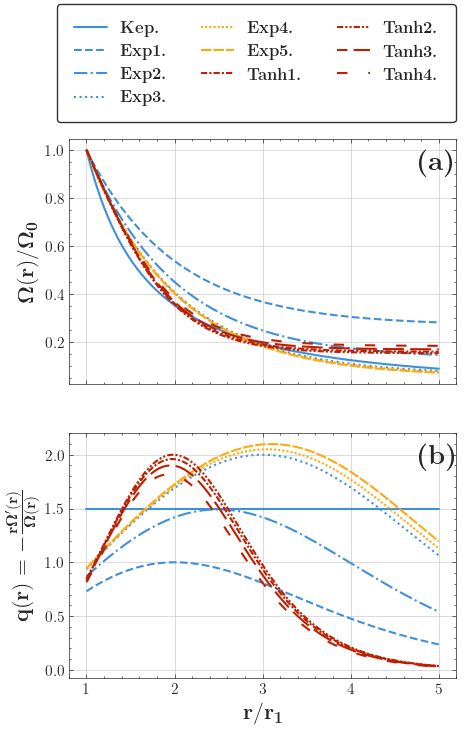

In [ ]:
import pandas as pd
from numpy.polynomial import Chebyshev as T
color_arr = ['#3F90DA', '#FFA90E', '#BD1F01', '#94A4A2', '#832DB6', '#A96B59', '#E76300', '#B9AC70', '#92DADD']

r = np.linspace(1,5,500)
data = pd.read_csv('Re750_4_0.1_0_to_1.txt', header = None, delim_whitespace=True)
print(data[0])
r_f = data[0]
W = data[1]
qr = data[2]
Wr = W
W_f = i2.CubicSpline(r_f, W)
Wp_f = W_f.derivative()


########
a = c = b = d = 1
a = 0.6
c = a
d = 0.9
r10 = 1.5
R0 = 1
W_mkep = np.zeros(len(r))
W_mkepp = np.zeros(len(r))

W_mkeppp = np.zeros(len(r))

for j in range(0,len(r)):
    if(r[j] < r10):
        W_mkep[j] = 1
    else:
        W_mkep[j] = 1/(1+((r[j]-r10)/R0)**(3/2))
        W_mkepp[j] = -3/(2*R0)*((r[j]-r10)/R0)**(1/2)/(1+((r[j]-r10)/R0)**(3/2))**2
        u = 1+((r[j]-r10)/R0)**(3/2)
        up = 3/(2*R0)*((r[j]-r10)/R0)**(1/2)
        W_mkeppp[j] = ( (3/(4*R0**2)*(1/R0*(r[j]-r10))**(-1/2))*u**2 - (3/(2*R0) * (1/R0*(r[j]-r10))**(1/2))*2*u*up)/(u**4)
# W_mkepppf = i2.CubicSpline(r,W_mkep).derivative().derivative()(r)

a = 0.9366210025563255
W_mkep = a*np.exp(1-r) + (1-a)
W_mkep_f = i2.CubicSpline(r,W_mkep)
W_mkepp = W_mkep_f.derivative()(r)

########
a = c = b = d = 1
a = 0.6
c = a
d = 0.9
r10 = 1.5
R0 = 1.5
W_mkep2 = np.zeros(len(r))
W_mkepp2 = np.zeros(len(r))

W_mkeppp2 = np.zeros(len(r))

for j in range(0,len(r)):
    if(r[j] < r10):
        W_mkep2[j] = 1
    else:
        W_mkep2[j] = 1/(1+((r[j]-r10)/R0)**(3/2))
        W_mkepp2[j] = -3/(2*R0)*((r[j]-r10)/R0)**(1/2)/(1+((r[j]-r10)/R0)**(3/2))**2
        u = 1+((r[j]-r10)/R0)**(3/2)
        up = 3/(2*R0)*((r[j]-r10)/R0)**(1/2)
        W_mkeppp2[j] = ( (3/(4*R0**2)*(1/R0*(r[j]-r10))**(-1/2))*u**2 - (3/(2*R0) * (1/R0*(r[j]-r10))**(1/2))*2*u*up)/(u**4)
# W_mkepppf = i2.CubicSpline(r,W_mkep).derivative().derivative()(r)

# a = .75
# c = a
# d = 1/(np.tanh(-4*a))*(1/5**(3/2)-1)-0.025
a = 0.8689352412721272
W_tanh_4 = a*np.exp(1-r) + (1-a)
W_tanh_f_4 = i2.CubicSpline(r,W_tanh_4)
Wp_tanh_4 = W_tanh_f_4.derivative()(r)

#####
x = r**2
A0 = 1.4923889E-02
A1 = -1.0114824E-01
A2 = 8.5753488E-02
A3 = -2.8021088E-02
A4 = -4.7882189E-01
A5 = 1.0877462E-01
A6 = 6.7857446E+00
A7 = -5.0846913E+00
A8 = -4.3114342E+01
A9 = 5.2943846E+01
A10 = 1.2219068E+02
A11 = -1.9185099E+02
A12 = -1.7535573E+02
A13 = 3.4808679E+02
A14 = 1.1975807E+02
A15 = -3.4500839E+02
A16 =  -1.4844420E+01
A17 = 1.7930272E+02
A18 = -2.5033736E+01
###  0.08875 + 0.91125/r^2 
# q = 1
# vp1 = 0.91125
# c = 0.08875
# vp = vp1/(x**(q/2))
# W = c + vp/np.sqrt(x)
W = 0.08875 + 0.91125/np.sqrt(x)**2 + A0 + A1*(np.sqrt(x)-2) + A2*(np.sqrt(x)-2)**2+A3*(np.sqrt(x)-2)**3 + A4*(np.sqrt(x)-2)**4 + A5*(np.sqrt(x)-2)**5 + A6*(np.sqrt(x)-2)**6 + A7*(np.sqrt(x)-2)**7 + A8*(np.sqrt(x)-2)**8 + A9*(np.sqrt(x)-2)**9 + A10*(np.sqrt(x)-2)**10 + A11*(np.sqrt(x)-2)**11 + A12*(np.sqrt(x)-2)**12 + A13*(np.sqrt(x)-2)**13 + A14*(np.sqrt(x)-2)**14 + A15*(np.sqrt(x)-2)**15 + A16*(np.sqrt(x)-2)**16 + A17*(np.sqrt(x)-2)**17 + A18*(np.sqrt(x)-2)**18 - ( A1 + A3 + A5 + A7 + A9 + A11 + A13 + A15 + A17 )*(np.sqrt(x)-2)**19 - ( A0 + A2 + A4 + A6 + A8 + A10 + A12 + A14 + A16 + A18 )*(np.sqrt(x)-2)**20
Wp = -0.91125/x**2 + A1*1/(2*np.sqrt(x)) + A2*(np.sqrt(x)-2)/np.sqrt(x) + A3*(np.sqrt(x)-2)**2*3/(2*np.sqrt(x)) + A4*(np.sqrt(x)-2)**3*4/(2*np.sqrt(x)) + A5*(np.sqrt(x)-2)**4*5/(2*np.sqrt(x)) + A6*(np.sqrt(x)-2)**5*6/(2*np.sqrt(x)) + A7*(np.sqrt(x)-2)**6*7/(2*np.sqrt(x)) + A8*(np.sqrt(x)-2)**7*8/(2*np.sqrt(x)) + A9*(np.sqrt(x)-2)**8*9/(2*np.sqrt(x)) + A10*(np.sqrt(x)-2)**9*10/(2*np.sqrt(x)) + A11*(np.sqrt(x)-2)**10*11/(2*np.sqrt(x)) + A12*(np.sqrt(x)-2)**11*12/(2*np.sqrt(x)) + A13*(np.sqrt(x)-2)**12*13/(2*np.sqrt(x)) + A14*(np.sqrt(x)-2)**13*14/(2*np.sqrt(x)) + A15*(np.sqrt(x)-2)**14*15/(2*np.sqrt(x)) + A16*(np.sqrt(x)-2)**15*16/(2*np.sqrt(x)) + A17*(np.sqrt(x)-2)**16*17/(2*np.sqrt(x)) + A18*(np.sqrt(x)-2)**17*18/(2*np.sqrt(x)) - ( A1 + A3 + A5 + A7 + A9 + A11 + A13 + A15 + A17 )*(np.sqrt(x)-2)**18*19/(2*np.sqrt(x))  - ( A0 + A2 + A4 + A6 + A8 + A10 + A12 + A14 + A16 + A18 )*(np.sqrt(x)-2)**19*20/(2*np.sqrt(x))     

W_poly = [1.46802831e-03, -2.83431433e-02,  2.11559654e-01, -6.57109947e-01,
-7.64601799e-02,  5.06678730e+00, -2.62954978e+00, -4.01210227e+01,
3.04579779e+01,  3.28246953e+02, -3.87065814e+02, -2.53347841e+03,
6.08416910e+03,  1.15343384e+04, -8.08073232e+04,  1.87829866e+05,
-2.54049234e+05,  2.18505853e+05, -1.18520251e+05,  3.71863092e+04,
-5.16265540e+03]

Wp_poly = [ 1.50454341e-03, -2.90564928e-02,  2.17042785e-01, -6.75645388e-01,
-6.89528913e-02,  5.18655592e+00, -2.78166003e+00, -4.09358742e+01,
3.19109263e+01,  3.33876372e+02, -4.00882065e+02, -2.56600921e+03,
6.22259476e+03,  1.15597185e+04, -8.18501208e+04,  1.90676951e+05,
-2.58212766e+05,  2.22286042e+05, -1.20664426e+05,  3.78871342e+04,
-5.26393755e+03]

Wf = W_poly[0] + W_poly[1]*r + W_poly[2]*r**2 + W_poly[3]*r**3 + W_poly[4]*r**4 + W_poly[5]*r**5 + W_poly[6]*r**6 + W_poly[7]*r**7 + W_poly[8]*r**8 + W_poly[9]*r**9+ W_poly[10]*r**10 +  W_poly[11]*r**11  +  W_poly[12]*r**12 +  W_poly[13]*r**13   +  W_poly[14]*r**14  +  W_poly[15]*r**15 +  W_poly[16]*r**16  +  W_poly[17]*r**17  +  W_poly[18]*r**18  +  W_poly[19]*r**19  +  W_poly[20]*r**20 


r = np.linspace(1,5,500)
a = 0.73123123
W_tanh = a*np.exp(1-r) + (1-a)
W_tanh_f = i2.CubicSpline(r,W_tanh)
Wp_tanh = W_tanh_f.derivative()(r)


fig, axs = plt.subplots(2)
fig.set_figheight(7)
fig.set_figwidth(5)
axs[0].plot(r, 1/r**(3/2), label = r'\textbf{Kep.}', color = color_arr[0], linewidth = 1.5)
axs[0].plot(r, W_tanh, label = r'\textbf{Exp1.}', linestyle = '--', color = color_arr[0], linewidth = 1.5)
axs[0].plot(r, W_tanh_4, label = r'\textbf{Exp2.}', linestyle = '-.', color = color_arr[0], linewidth = 1.5)
axs[0].plot(r, W_mkep, label = r'\textbf{Exp3.}', linestyle = ':', color = color_arr[0], linewidth = 1.5)

#(0, (3, 1, 1, 1, 1, 1))
axs[1].plot(r, r/(1/r**(3/2)) * (3/2)/r**(5/2), color = color_arr[0], linewidth = 1.5)
axs[1].plot(r, -r*Wp_tanh/W_tanh, linestyle = '--', color = color_arr[0], linewidth = 1.5)
axs[1].plot(r, -r*Wp_tanh_4/W_tanh_4, linestyle = '-.', color = color_arr[0], linewidth = 1.5)
axs[1].plot(r, -r/W_mkep*W_mkepp, linestyle = ':', color = color_arr[0], linewidth = 1.5)


a = 0.9409132827360274
W_tanh = a*np.exp(1-r) + (1-a)
W_tanh_f = i2.CubicSpline(r,W_tanh)
Wp_tanh = W_tanh_f.derivative()(r)
axs[0].plot(r, W_tanh, label = r'\textbf{Exp4.}', linestyle = (0, (1, 1)), color = color_arr[1], linewidth = 1.5)
axs[1].plot(r, -r*Wp_tanh/W_tanh, linestyle = (0, (1, 1)), color = color_arr[1], linewidth = 1.5)

a = 0.9448239074457745
W_tanh = a*np.exp(1-r) + (1-a)
W_tanh_f = i2.CubicSpline(r,W_tanh)
Wp_tanh = W_tanh_f.derivative()(r)
axs[0].plot(r, W_tanh, label = r'\textbf{Exp5.}', linestyle = (0, (5, 1)), color = color_arr[1], linewidth = 1.5)
axs[1].plot(r, -r*Wp_tanh/W_tanh, linestyle = (0, (5, 1)), color = color_arr[1], linewidth = 1.5)


################## TANH PROFILES
a = 0.8400
W_Tanh = i2.CubicSpline(r, a*np.tanh(1-r)+1)
W_tanh = W_Tanh(r)
W_tanh_f = i2.CubicSpline(r, W_Tanh(r))
Wp_tanh = W_tanh_f.derivative()(r)
axs[0].plot(r, W_tanh, label = r'\textbf{Tanh1.}', linestyle = (0, (3, 1, 1, 1)), color = color_arr[2], linewidth = 1.5)
axs[1].plot(r, -r*Wp_tanh/W_tanh, linestyle = (0, (3, 1, 1, 1)), color = color_arr[2], linewidth = 1.5)

a = 0.8463
W_Tanh = i2.CubicSpline(r, a*np.tanh(1-r)+1)
W_tanh = W_Tanh(r)
W_tanh_f = i2.CubicSpline(r,W_Tanh(r))
Wp_tanh = W_tanh_f.derivative()(r)
axs[0].plot(r, W_tanh, label = r'\textbf{Tanh2.}', linestyle = (0, (3, 1, 1, 1, 1, 1)), color = color_arr[2], linewidth = 1.5)
axs[1].plot(r, -r*Wp_tanh/W_tanh, linestyle = (0, (3, 1, 1, 1, 1, 1)), color = color_arr[2], linewidth = 1.5)

a = 0.8303
W_Tanh = i2.CubicSpline(r, a*np.tanh(1-r)+1)
W_tanh = W_Tanh(r)
W_tanh_f = i2.CubicSpline(r,W_Tanh(r))
Wp_tanh = W_tanh_f.derivative()(r)
axs[0].plot(r, W_tanh, label = r'\textbf{Tanh3.}', linestyle = (5, (10, 3)), color = color_arr[2], linewidth = 1.5)
axs[1].plot(r, -r*Wp_tanh/W_tanh, linestyle = (5, (10, 3)), color = color_arr[2], linewidth = 1.5)

a = 0.8158134053621449
W_Tanh = i2.CubicSpline(r, a*np.tanh(1-r)+1)
W_tanh = W_Tanh(r)
W_tanh_f = i2.CubicSpline(r,W_Tanh(r))
Wp_tanh = W_tanh_f.derivative()(r)
axs[0].plot(r, W_tanh, label = r'\textbf{Tanh4.}', linestyle = (0, (5, 10)), color = color_arr[2], linewidth = 1.5)
axs[1].plot(r, -r*Wp_tanh/W_tanh, linestyle = (0, (5, 10)), color = color_arr[2], linewidth = 1.5)



axs[0].set(xlabel='x-label', ylabel=r'$\Omega(r)/\Omega_0$')
axs[1].set(xlabel=r'$r/r_1$', ylabel=r"$q(r) = -\frac{r\Omega'(r)}{\Omega(r)}$")
axs[0].set_ylabel(r'$\mathbf{\Omega(r)/\Omega_0}$', fontsize =16)
axs[1].set_xlabel(r"$\mathbf{r/r_1}$", fontsize=16) 
axs[1].set_ylabel(r"$\mathbf{q(r) = -\frac{r\Omega'(r)}{\Omega(r)}}$", fontsize=16) 

# axs[1].set_title('Axis [1, 1]')

# for ax in axs.flat:
#     ax.set(xlabel='x-label', ylabel='y-label')
axs[0].text(0.90, 0.96, r'\textbf{(a)}', transform=axs[0].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')
axs[1].text(0.90, 0.96, r'\textbf{(b)}', transform=axs[1].transAxes, fontsize=20, verticalalignment='top', horizontalalignment='left')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
# fig.legend(lines, labels, loc='lower center', ncol=4)

fig.legend(lines, labels, loc='lower center', ncol=3, 
           bbox_to_anchor=(0.5, +0.88),  # Position the legend below the plot
           frameon=True,  # Turn on the frame (border)
           edgecolor='black',  # Set the border color
           facecolor='white',  # Set the background color of the legend box
           borderpad=1,  # Padding between the legend text and the border
           borderaxespad=1, fontsize = 12)

plt.savefig('Flow-Shear-Param-Var-v4-5r1.pdf', bbox_inches='tight', dpi=400)

plt.show()
plt.close()
